In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('to_csv_all/to_csv/train/train_병합/train_3_매출정보.csv')

In [3]:
# 막대 위에 숫자 표시 함수
def annotate_countplot(ax, spacing=5):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height):,}',  # 예: 1,234
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, spacing),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

In [4]:
def plot_and_count_zero(df, column_name):
    # 고유값 정렬
    order = sorted(df[column_name].unique())
    
    # 카운트플롯
    ax = sns.countplot(data=df, x=column_name, hue=column_name, order=order)
    annotate_countplot(ax)
    plt.show()
    
    # 최빈값과 개수 구하기
    value_counts = df[column_name].value_counts()

    most_common_value = value_counts.index[0]
    most_common_count = value_counts.iloc[0]
    total = len(df)

    print(f"최빈값: {most_common_value}")
    print(f"개수: {most_common_count} ({most_common_count / total:.2%})")

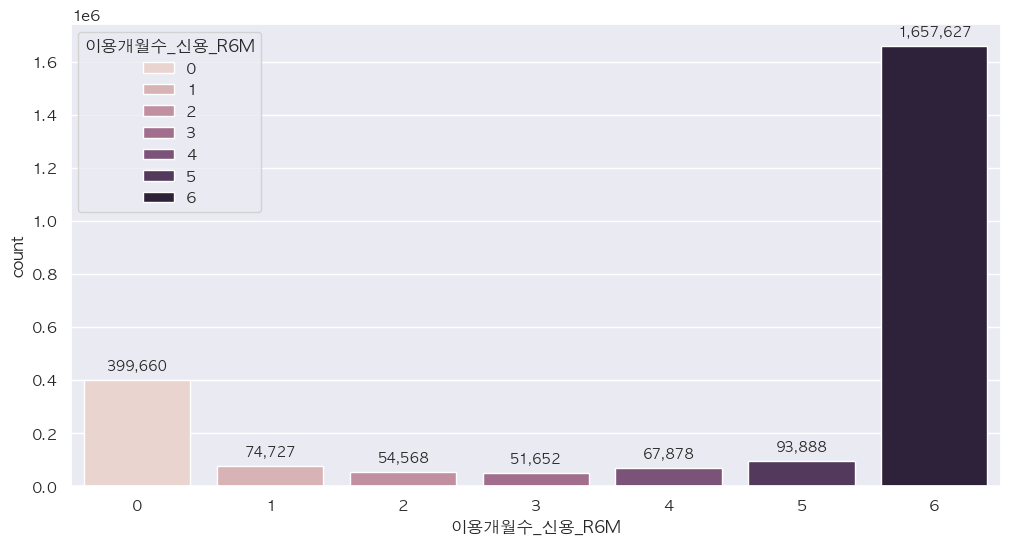

최빈값: 6
개수: 1657627 (69.07%)


In [5]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_신용_R6M')

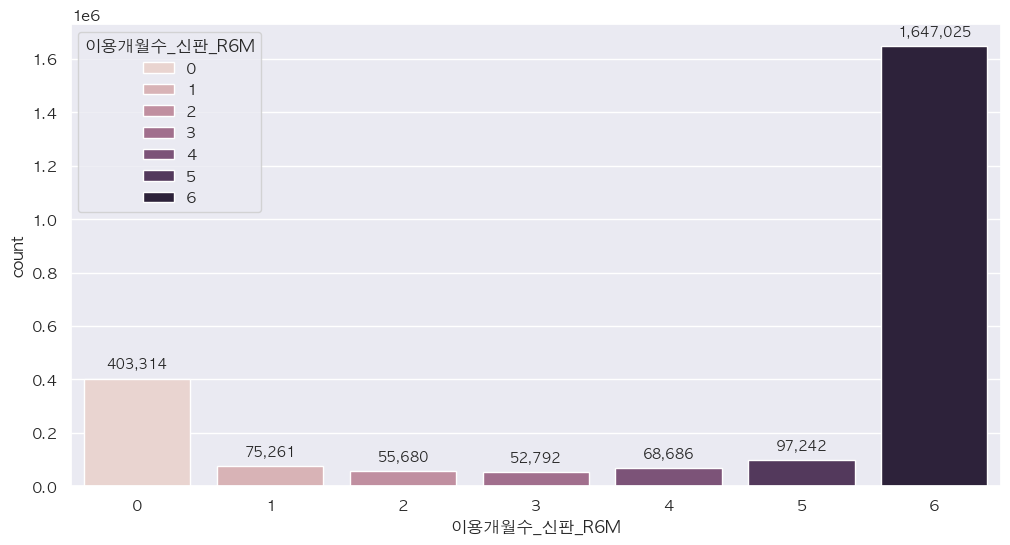

최빈값: 6
개수: 1647025 (68.63%)


In [6]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_신판_R6M')

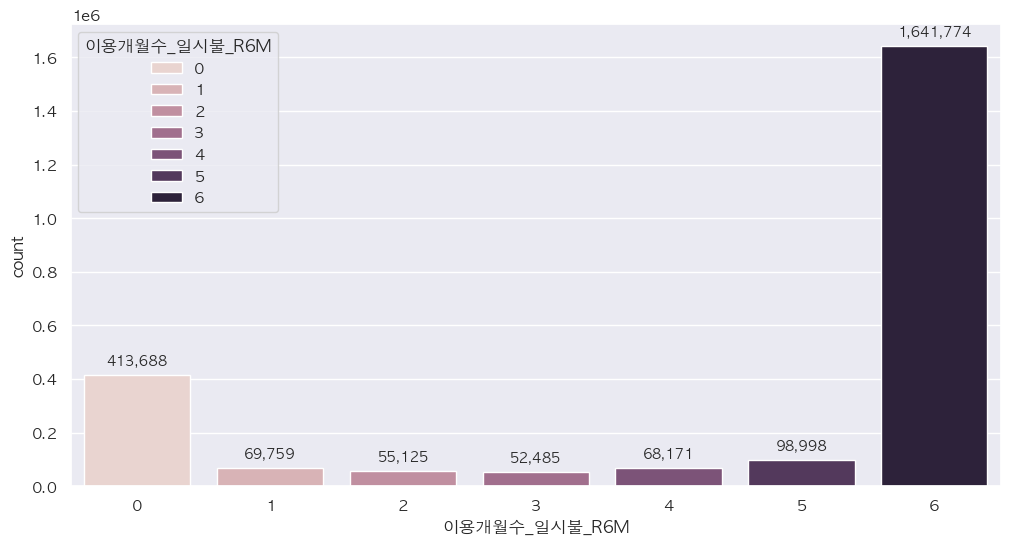

최빈값: 6
개수: 1641774 (68.41%)


In [7]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_일시불_R6M')

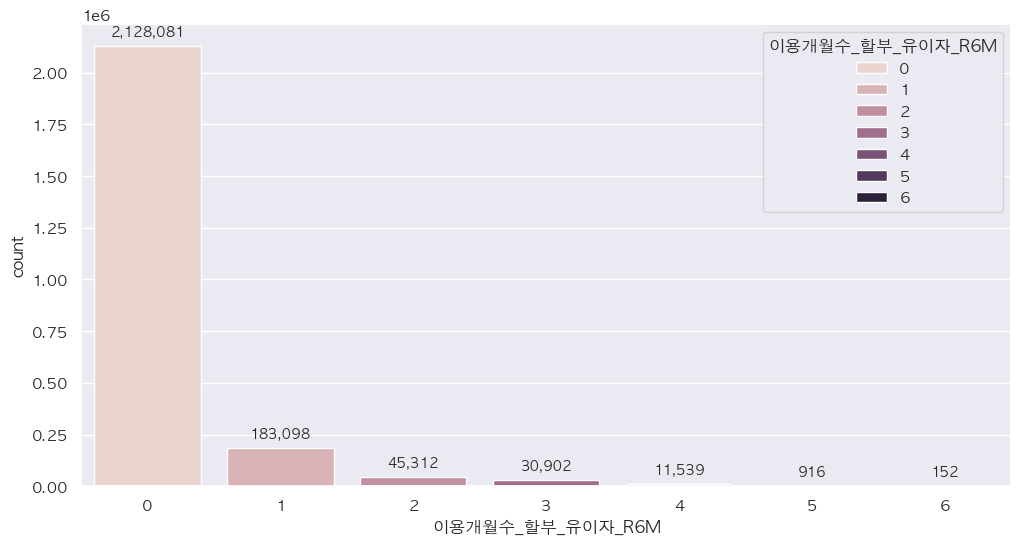

최빈값: 0
개수: 2128081 (88.67%)


In [8]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_할부_유이자_R6M')

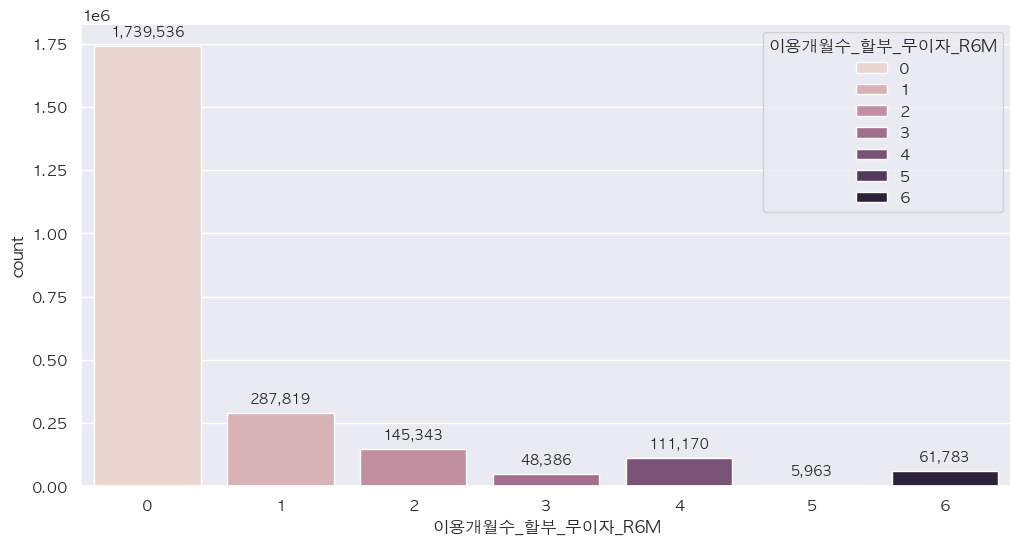

최빈값: 0
개수: 1739536 (72.48%)


In [9]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_할부_무이자_R6M')

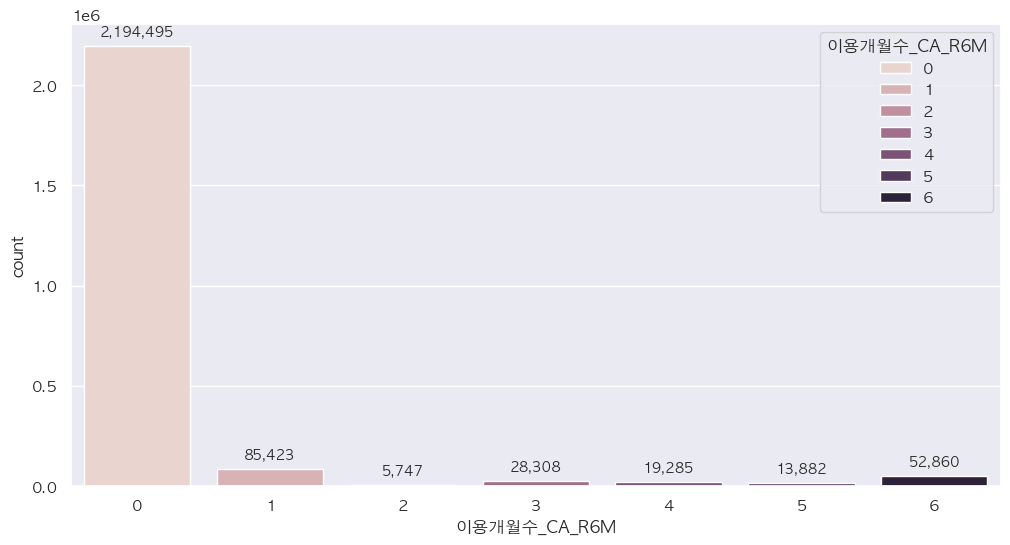

최빈값: 0
개수: 2194495 (91.44%)


In [10]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_CA_R6M')

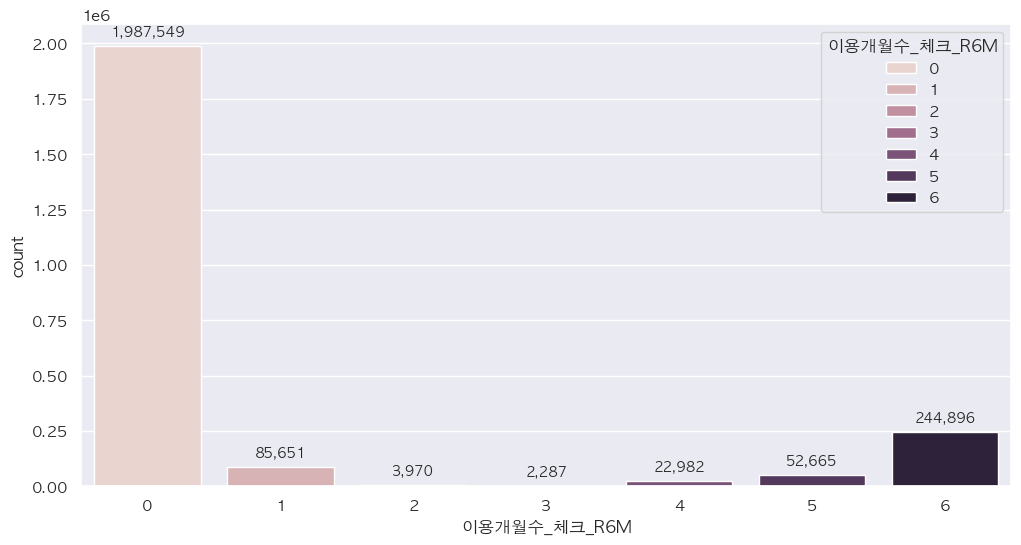

최빈값: 0
개수: 1987549 (82.81%)


In [11]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_체크_R6M')

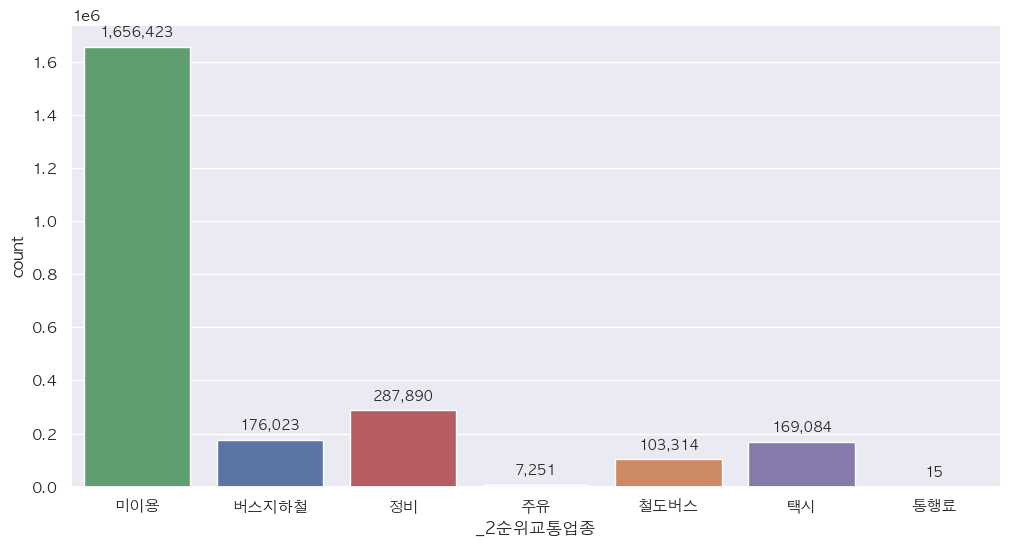

최빈값: 미이용
개수: 1656423 (69.02%)


In [12]:
# 비율 확인하기
plot_and_count_zero(df1, '_2순위교통업종')

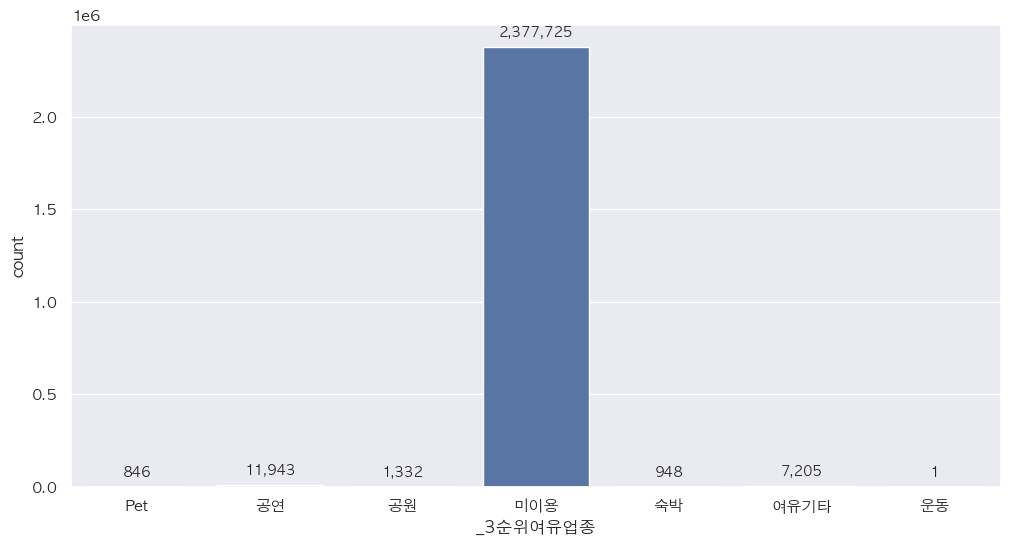

최빈값: 미이용
개수: 2377725 (99.07%)


In [25]:
# 비율 확인하기
plot_and_count_zero(df1, '_3순위여유업종')

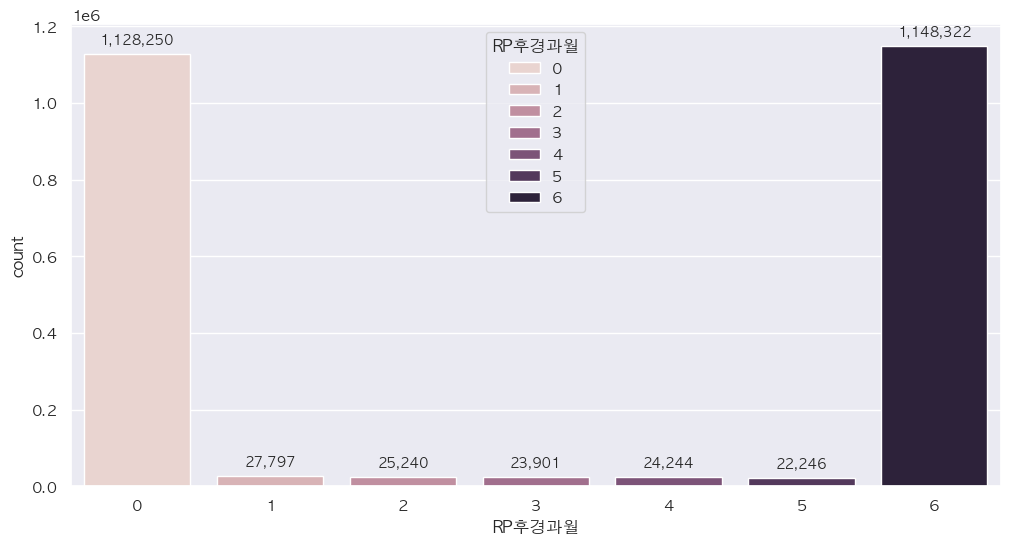

최빈값: 6
개수: 1148322 (47.85%)


In [26]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월')

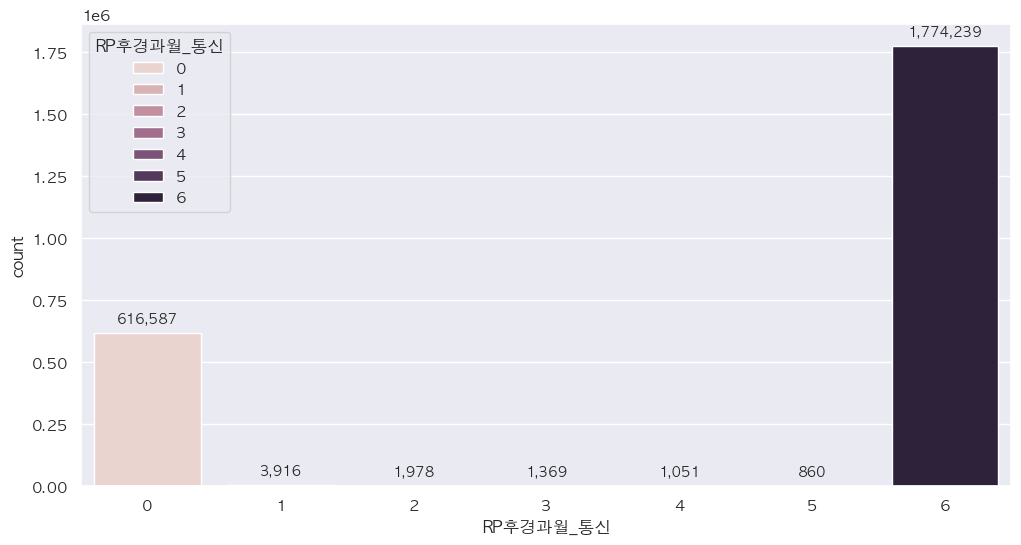

최빈값: 6
개수: 1774239 (73.93%)


In [27]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_통신')

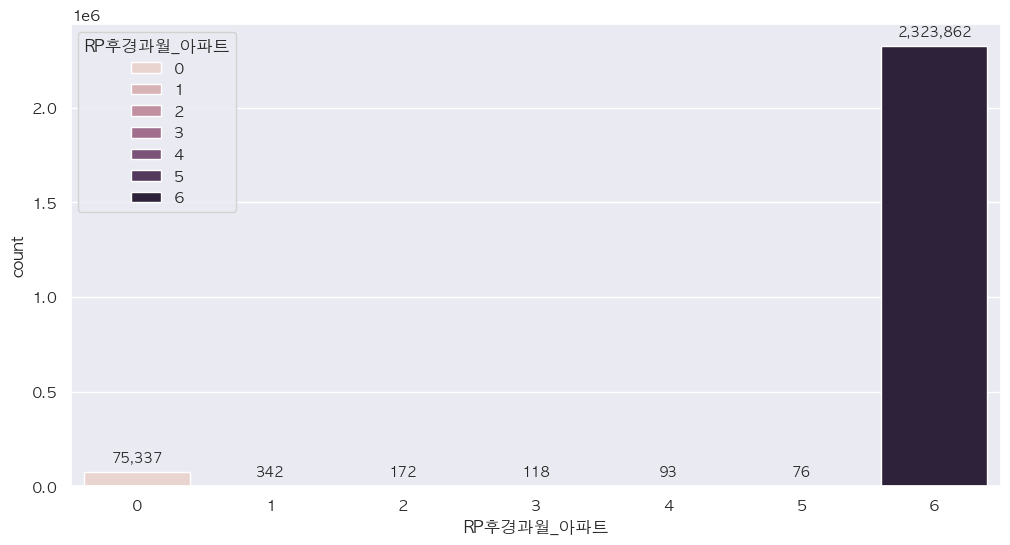

최빈값: 6
개수: 2323862 (96.83%)


In [28]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_아파트')

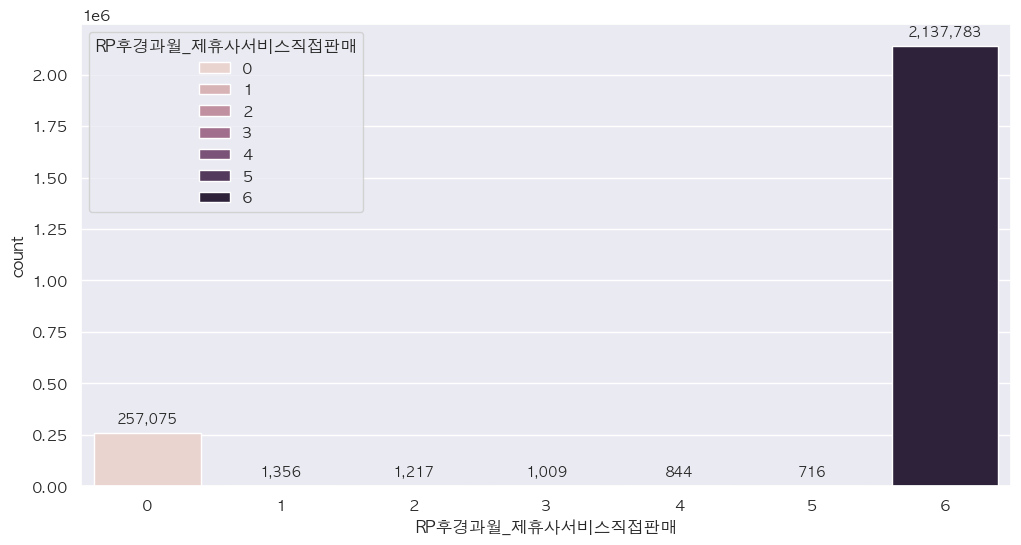

최빈값: 6
개수: 2137783 (89.07%)


In [29]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_제휴사서비스직접판매')

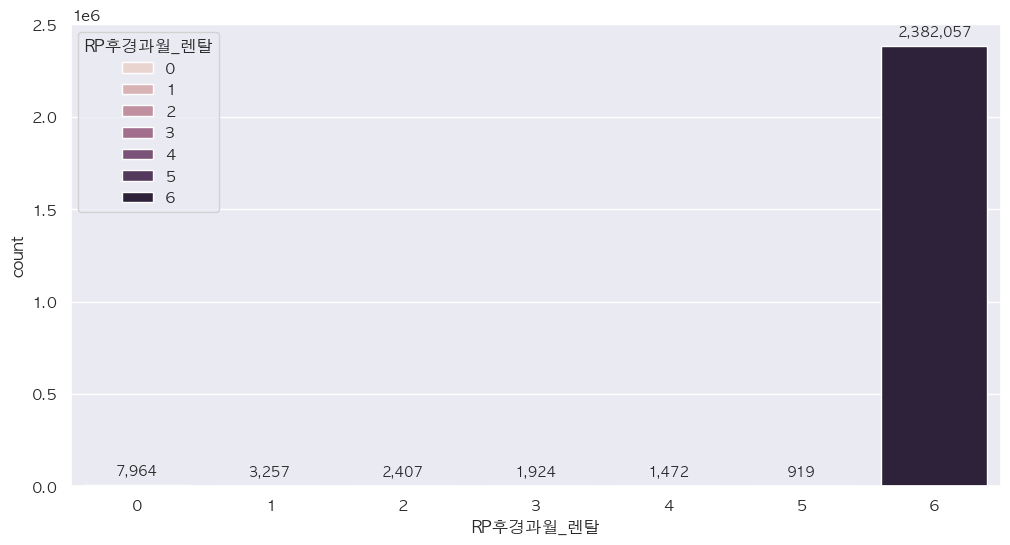

최빈값: 6
개수: 2382057 (99.25%)


In [30]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_렌탈')

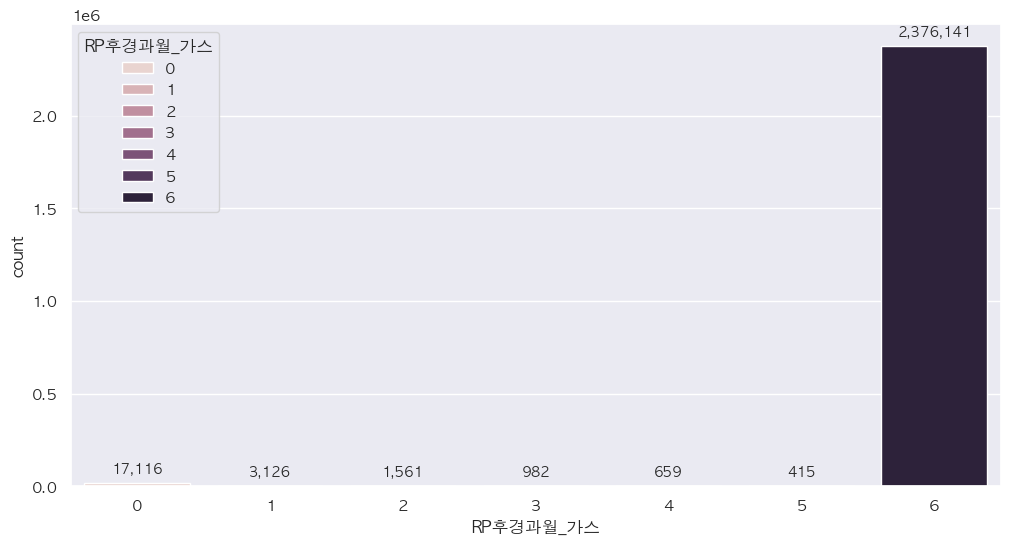

최빈값: 6
개수: 2376141 (99.01%)


In [31]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_가스')

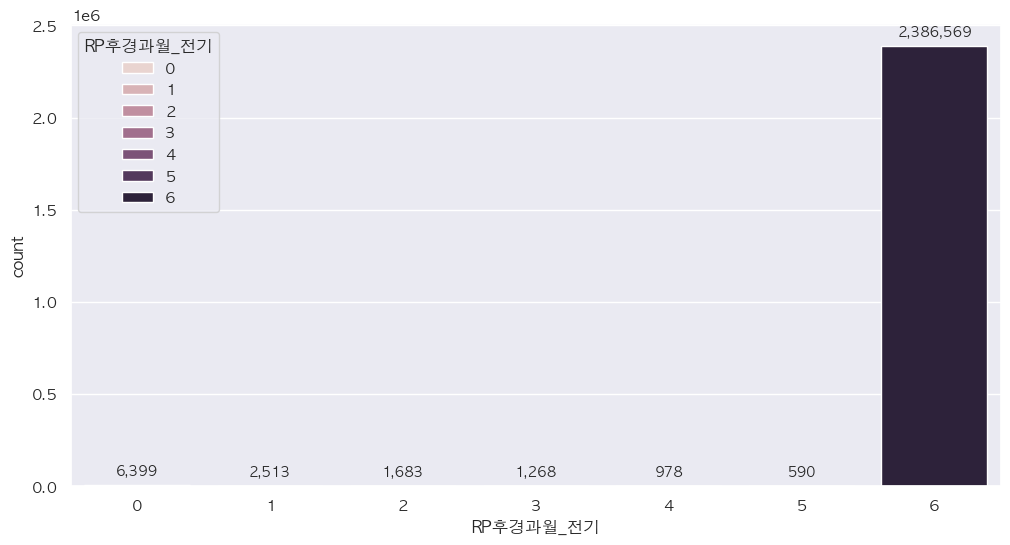

최빈값: 6
개수: 2386569 (99.44%)


In [32]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_전기')

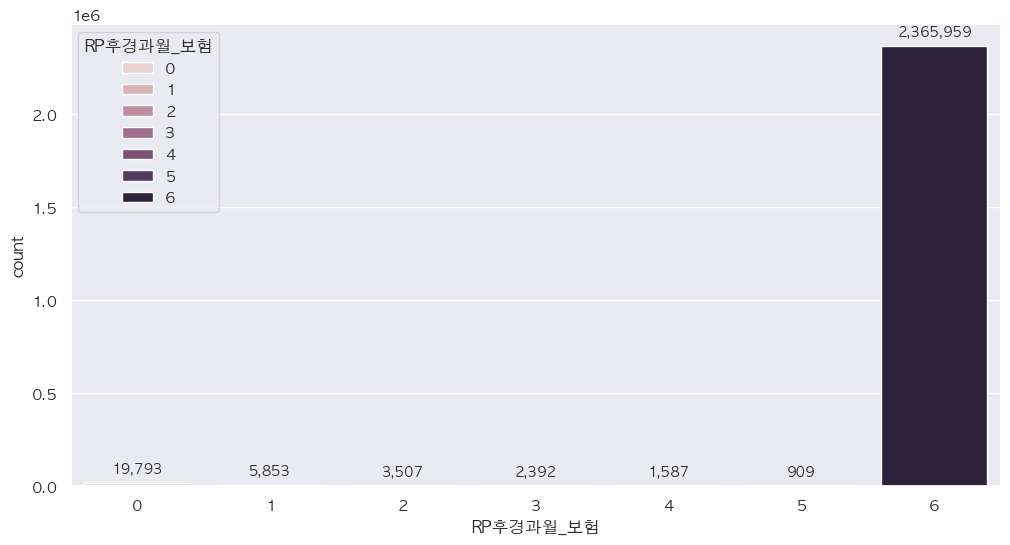

최빈값: 6
개수: 2365959 (98.58%)


In [33]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_보험')

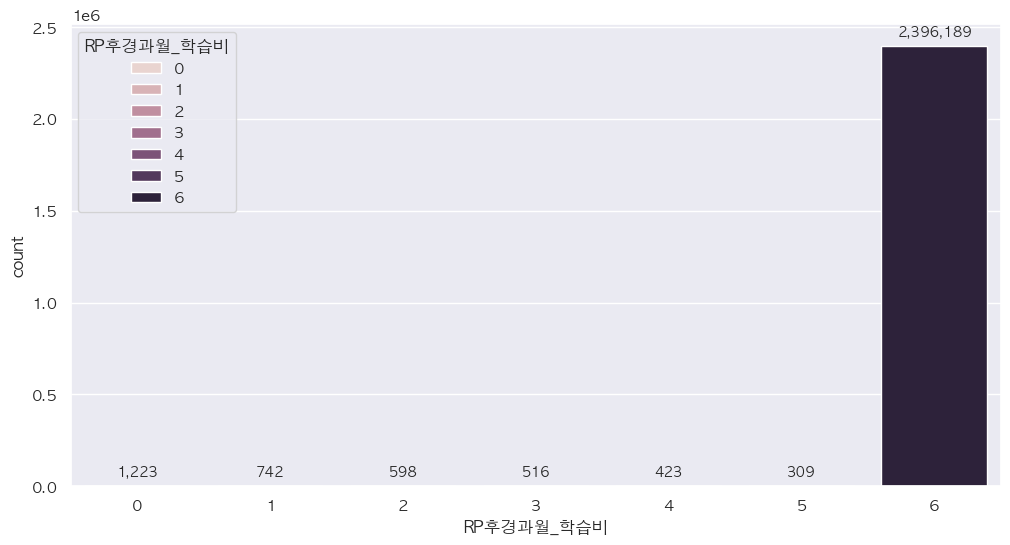

최빈값: 6
개수: 2396189 (99.84%)


In [34]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_학습비')

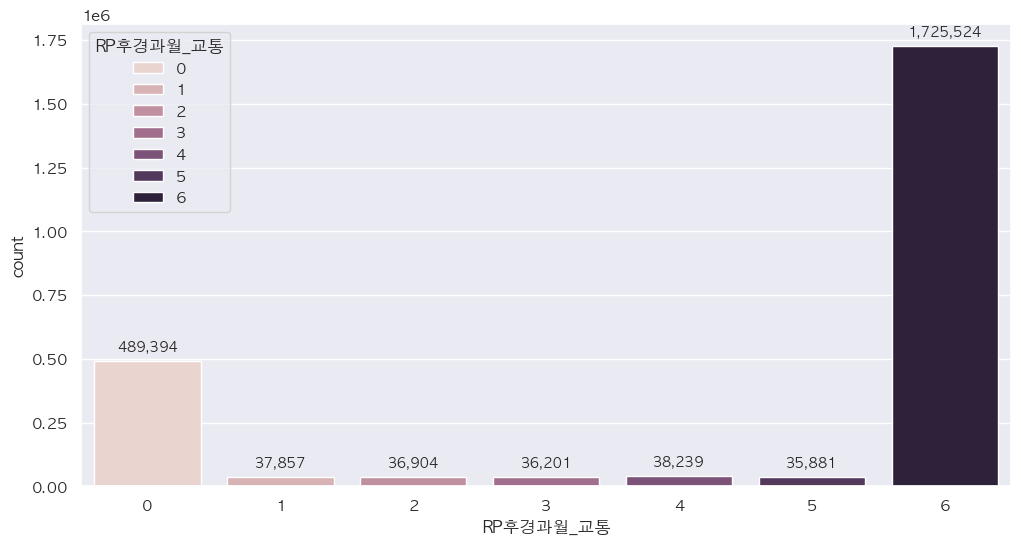

최빈값: 6
개수: 1725524 (71.90%)


In [35]:
# 비율 확인하기
plot_and_count_zero(df1, 'RP후경과월_교통')

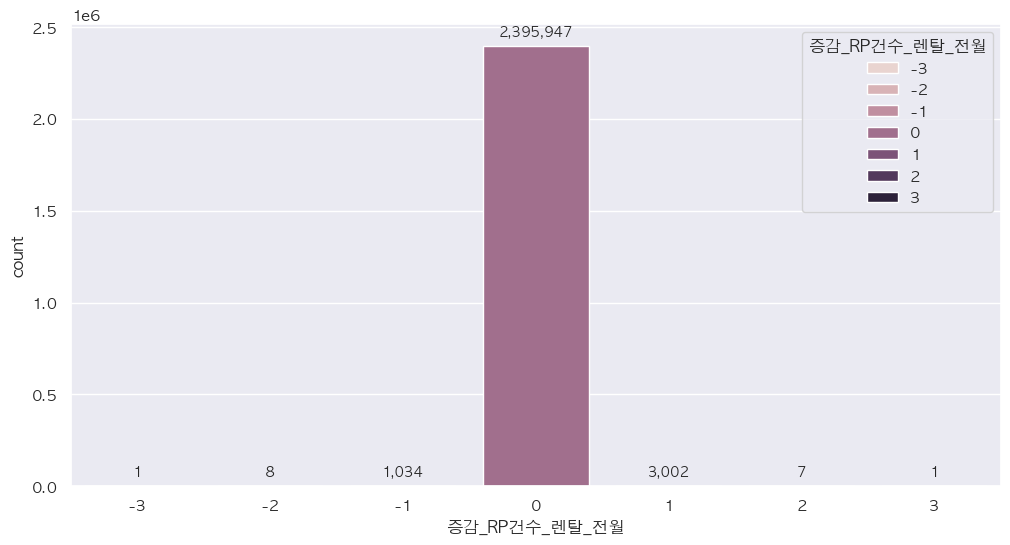

최빈값: 0
개수: 2395947 (99.83%)


In [36]:
# 비율 확인하기
plot_and_count_zero(df1, '증감_RP건수_렌탈_전월')

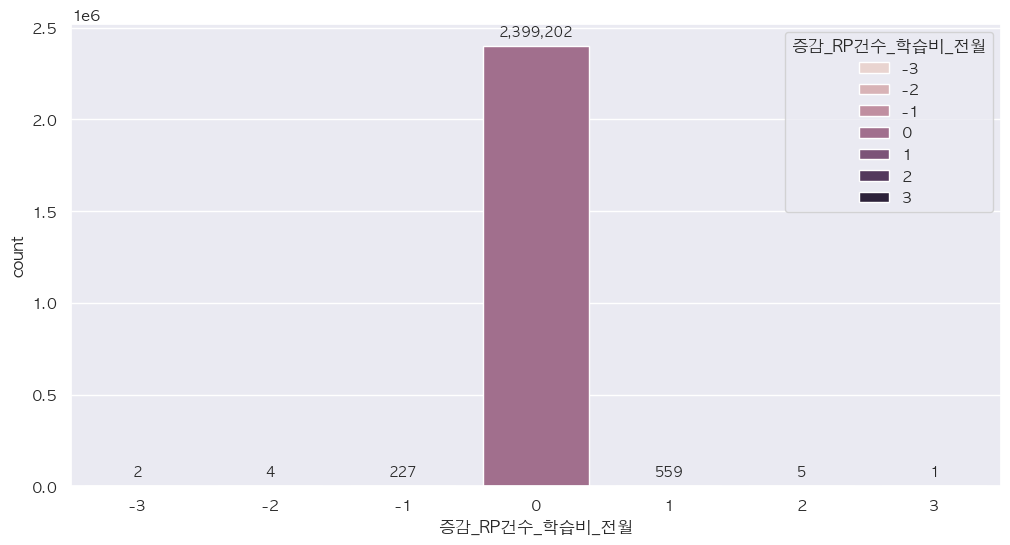

최빈값: 0
개수: 2399202 (99.97%)


In [37]:
# 비율 확인하기
plot_and_count_zero(df1, '증감_RP건수_학습비_전월')

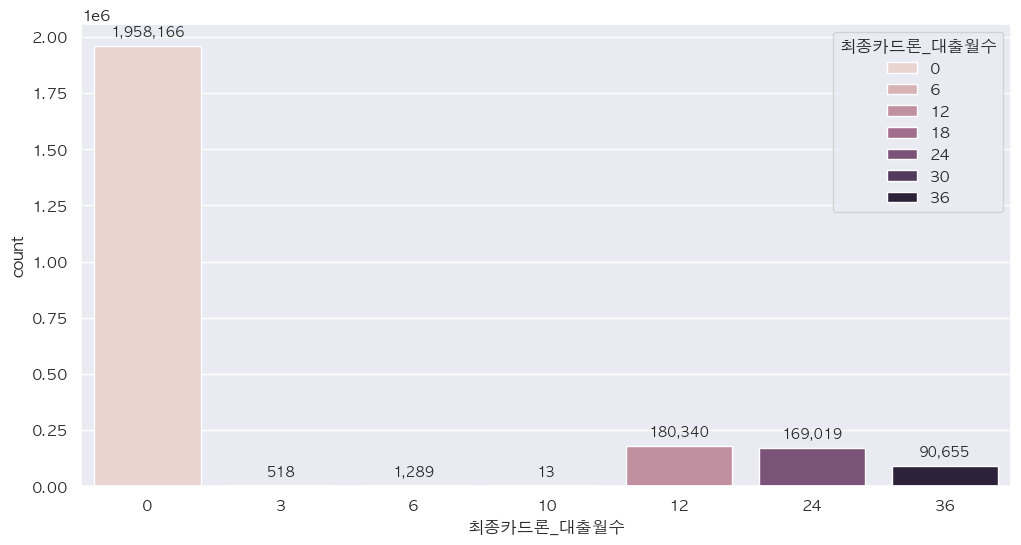

최빈값: 0
개수: 1958166 (81.59%)


In [39]:
# 비율 확인하기
plot_and_count_zero(df1, '최종카드론_대출월수')

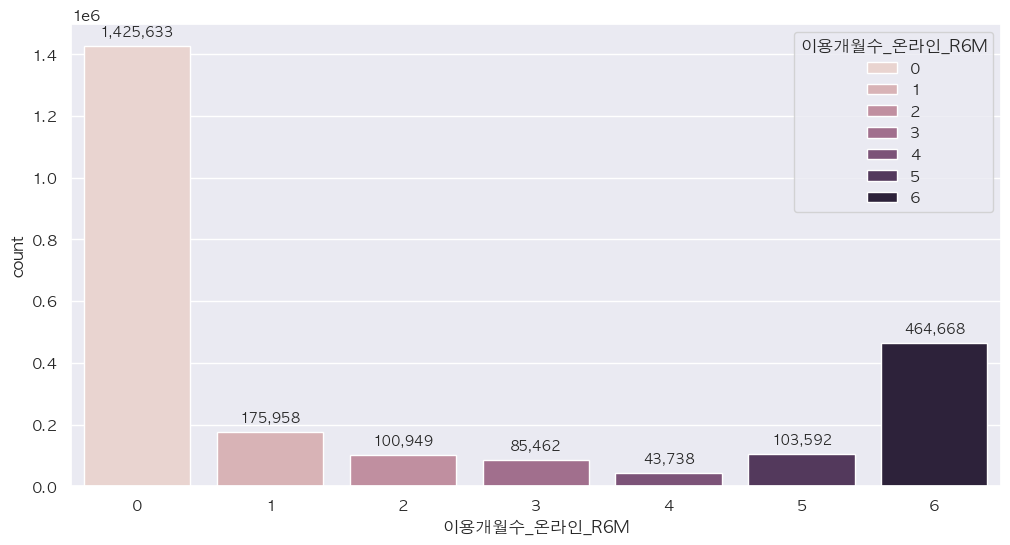

최빈값: 0
개수: 1425633 (59.40%)


In [40]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_온라인_R6M')

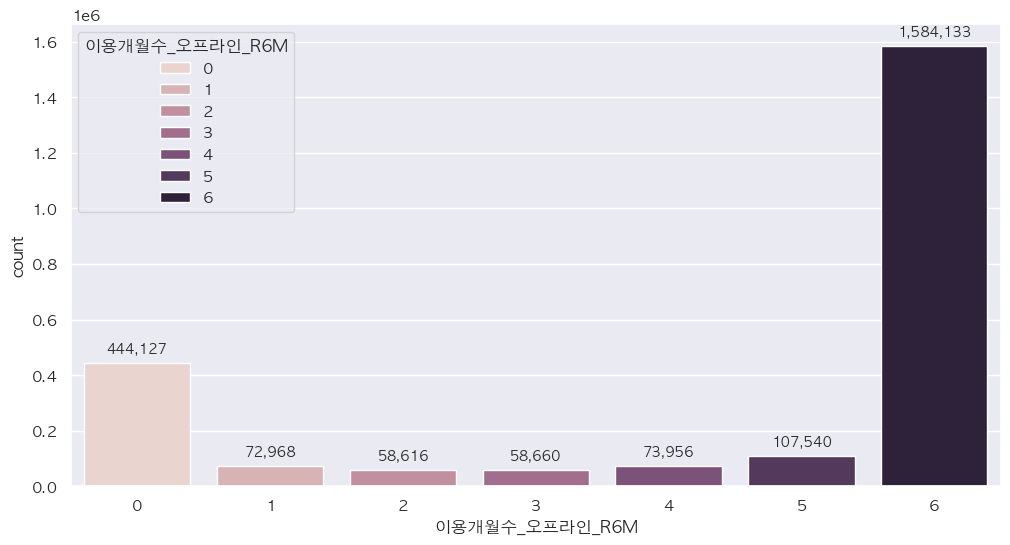

최빈값: 6
개수: 1584133 (66.01%)


In [41]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_오프라인_R6M')

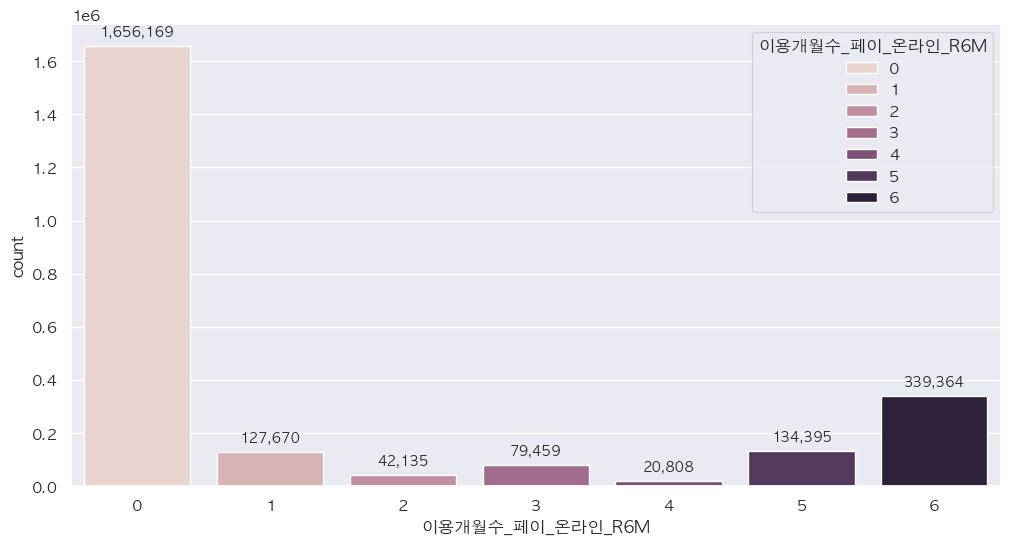

최빈값: 0
개수: 1656169 (69.01%)


In [42]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_페이_온라인_R6M')

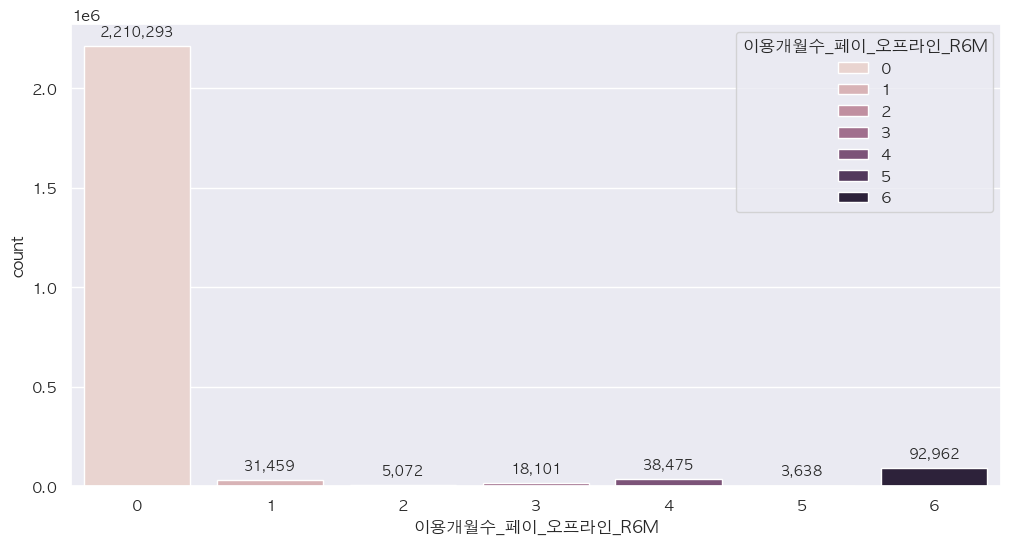

최빈값: 0
개수: 2210293 (92.10%)


In [43]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_페이_오프라인_R6M')

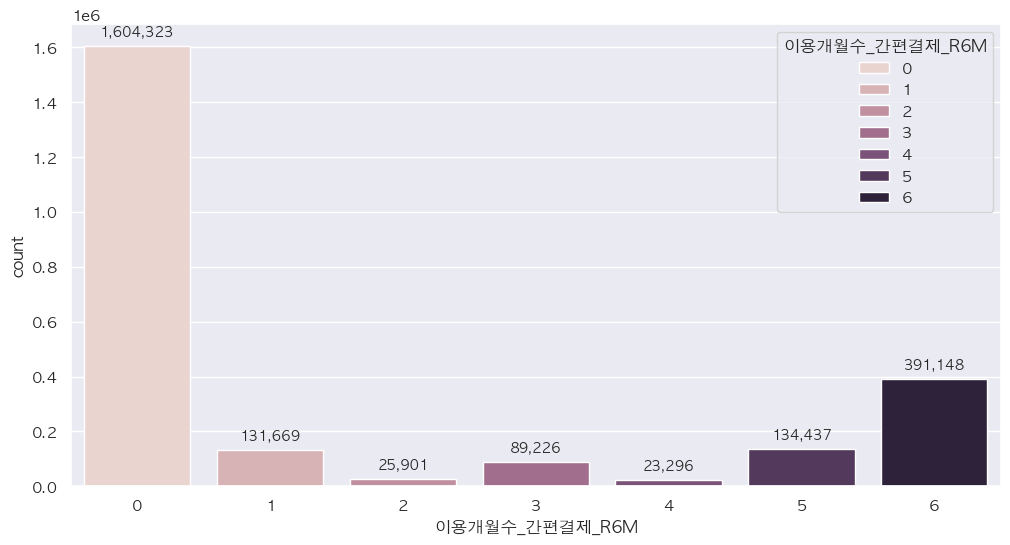

최빈값: 0
개수: 1604323 (66.85%)


In [44]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_간편결제_R6M')

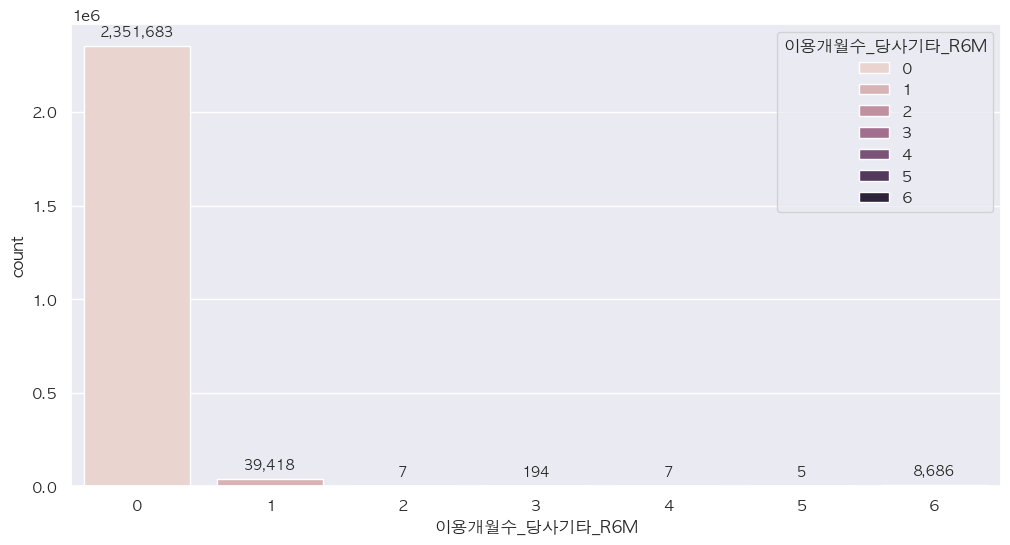

최빈값: 0
개수: 2351683 (97.99%)


In [45]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_당사기타_R6M')

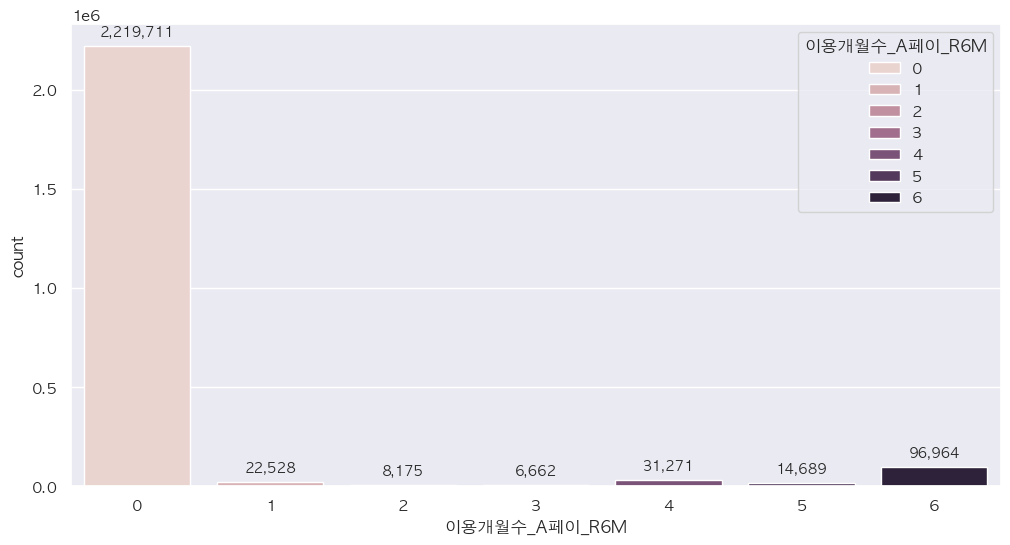

최빈값: 0
개수: 2219711 (92.49%)


In [46]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_A페이_R6M')

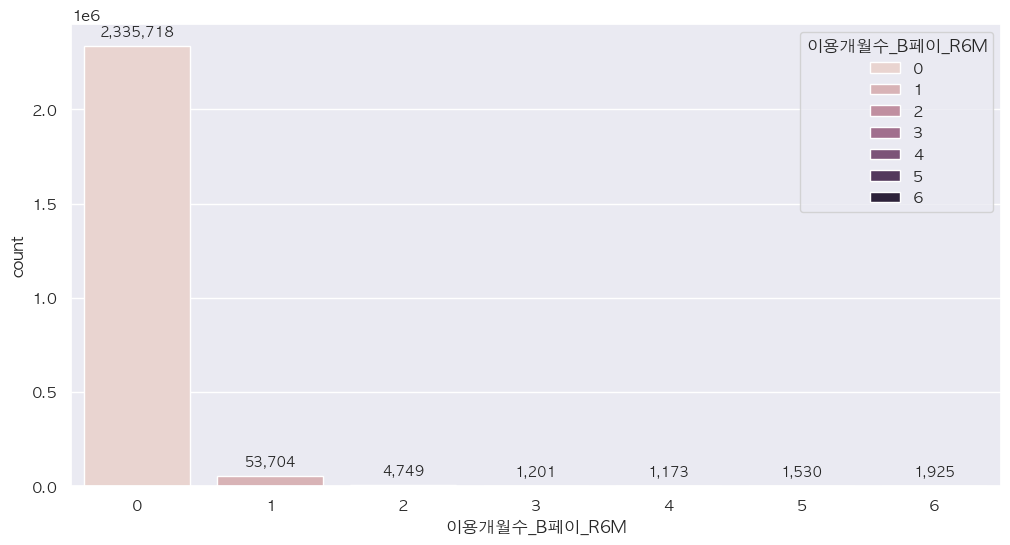

최빈값: 0
개수: 2335718 (97.32%)


In [47]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_B페이_R6M')

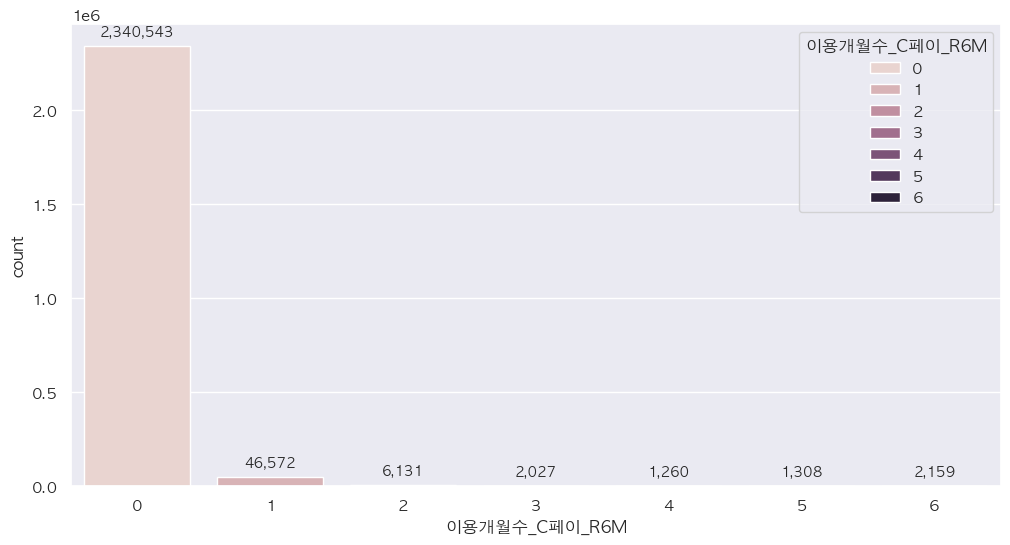

최빈값: 0
개수: 2340543 (97.52%)


In [48]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_C페이_R6M')

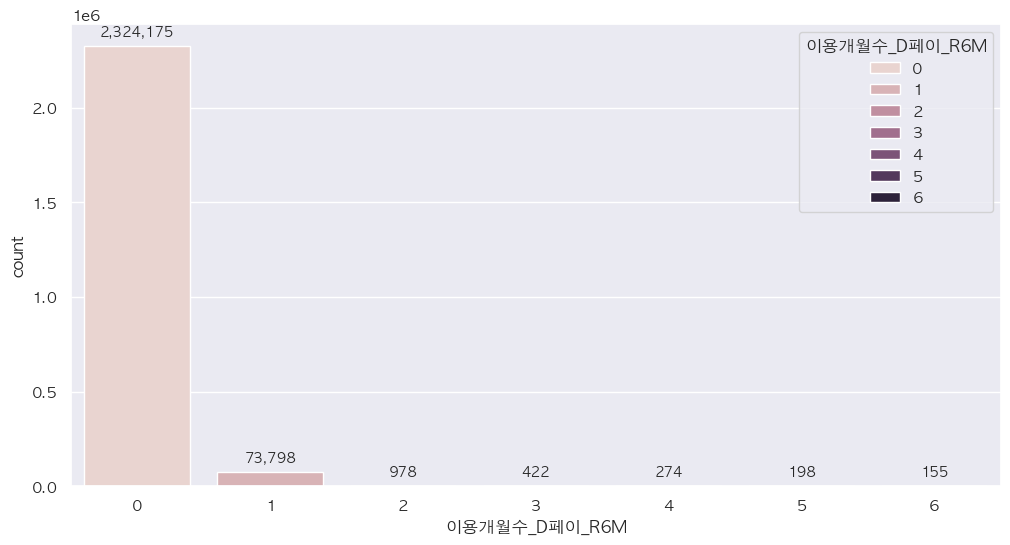

최빈값: 0
개수: 2324175 (96.84%)


In [49]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_D페이_R6M')

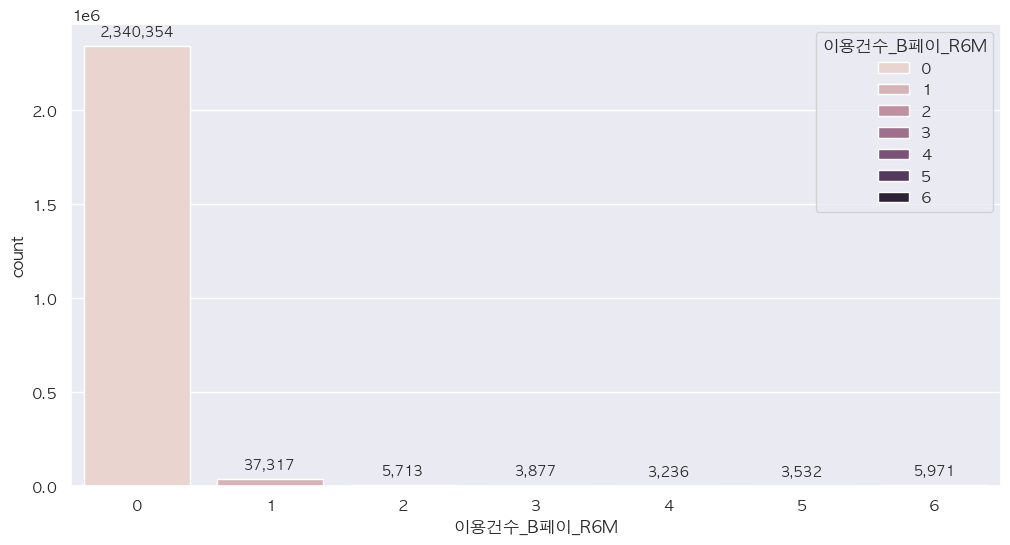

최빈값: 0
개수: 2340354 (97.51%)


In [52]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_B페이_R6M')

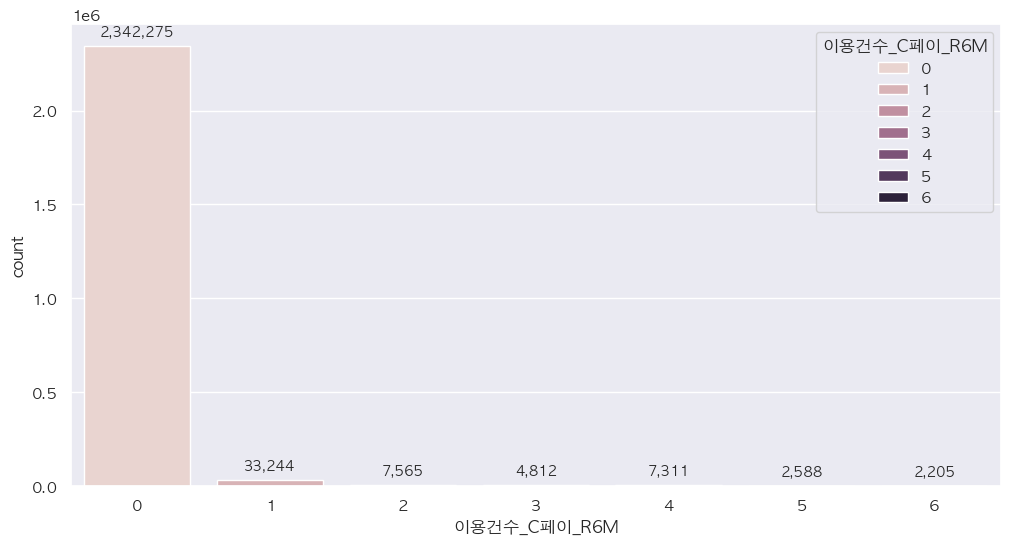

최빈값: 0
개수: 2342275 (97.59%)


In [53]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_C페이_R6M')

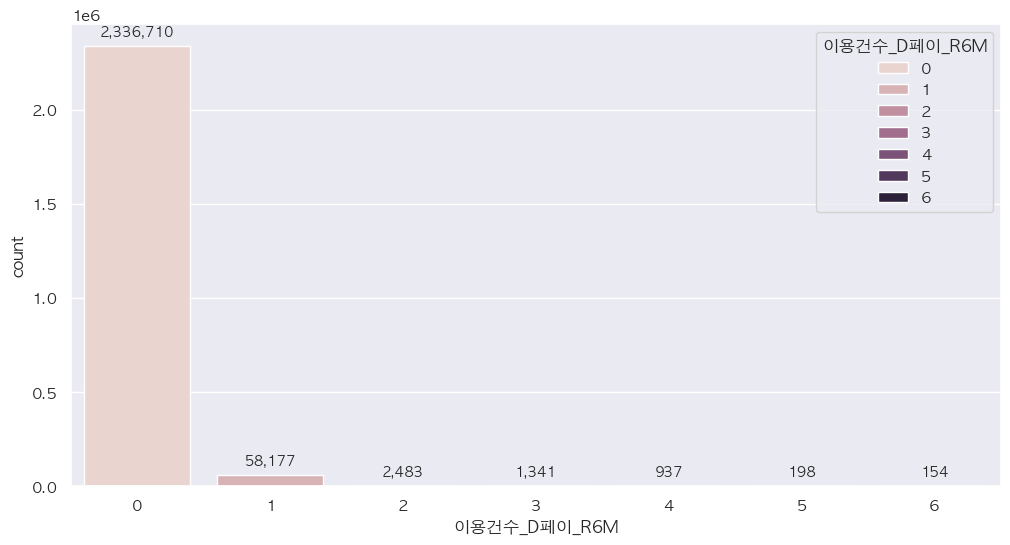

최빈값: 0
개수: 2336710 (97.36%)


In [54]:
# 비율 확인하기
plot_and_count_zero(df1, '이용건수_D페이_R6M')

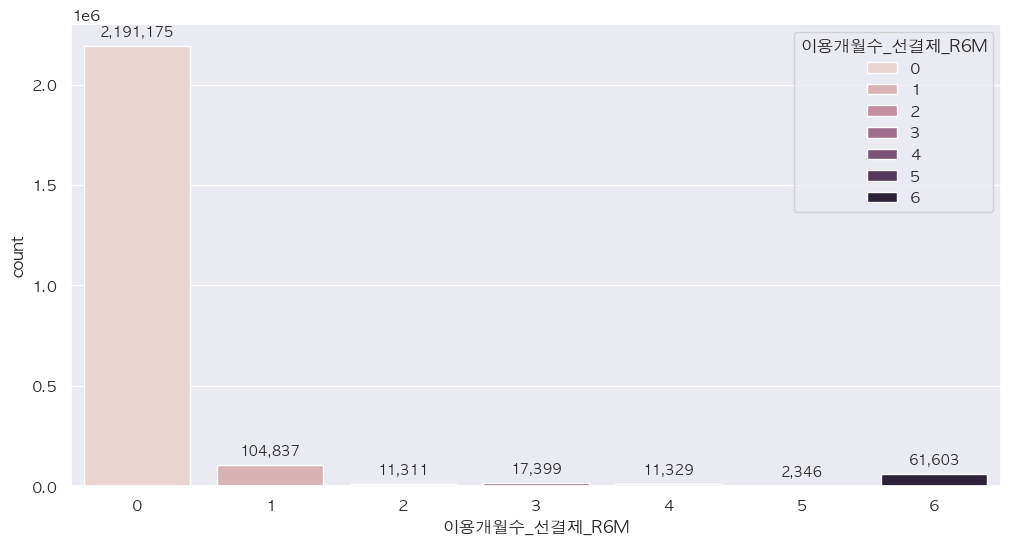

최빈값: 0
개수: 2191175 (91.30%)


In [55]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_선결제_R6M')

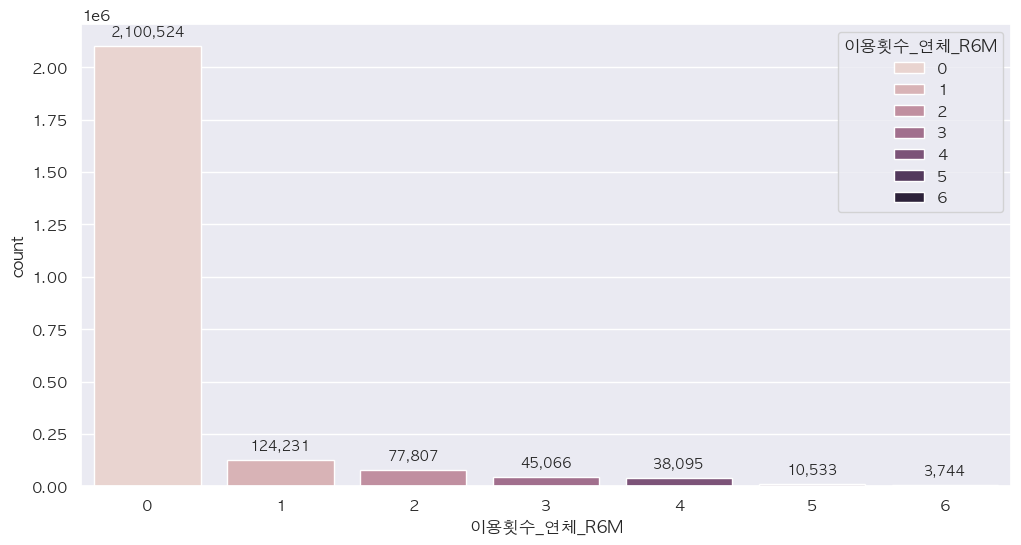

최빈값: 0
개수: 2100524 (87.52%)


In [56]:
# 비율 확인하기
plot_and_count_zero(df1, '이용횟수_연체_R6M')

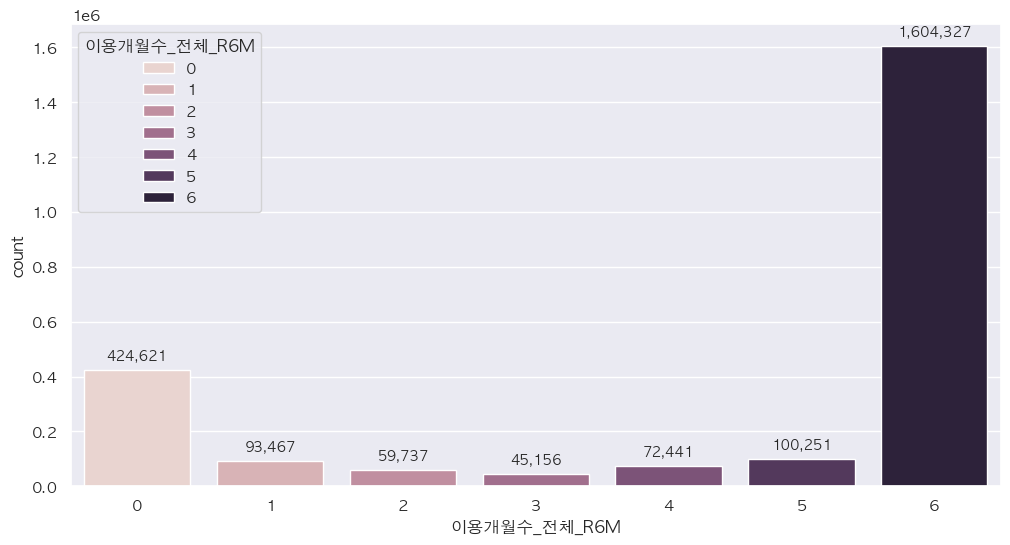

최빈값: 6
개수: 1604327 (66.85%)


In [58]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_전체_R6M')

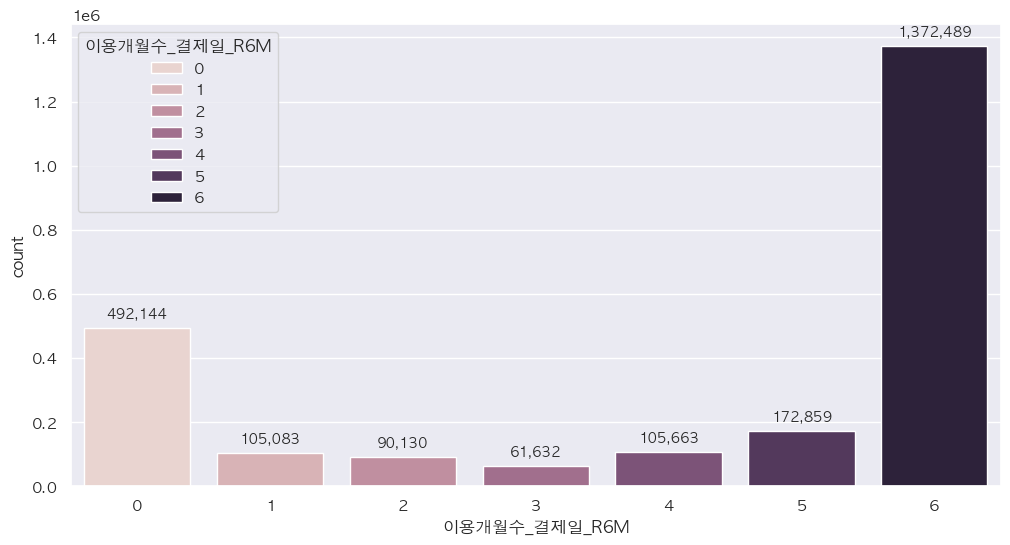

최빈값: 6
개수: 1372489 (57.19%)


In [59]:
# 비율 확인하기
plot_and_count_zero(df1, '이용개월수_결제일_R6M')